In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aaravnoronha/SportsAnalyticsPolygence/main/gsw_game_data_five_seasons.csv", index_col=0, error_bad_lines=False)


In [ ]:
df

,MP,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,Outcome
0,0.0,-0.13,-0.11,-0.05,-0.12,-4.9,-4.9,-9.6,13.2,-4.6,-0.1,-1.7,0.0,-23.5,23.5,L
1,0.0,-0.23,-0.27,0.05,-0.04,-8.1,-8.1,-16.6,-8.8,-0.9,3.7,-5.3,0.0,-36.3,36.3,L
2,0.0,-0.09,-0.12,-0.02,-0.07,-0.9,-0.9,-13.6,-1.9,11.3,-1.6,-10.1,0.0,0.8,-0.8,W
3,0.0,0.13,0.14,0.05,0.16,-18.7,-18.7,-5.8,-4.7,0.0,0.0,4.6,0.0,9.8,-9.8,W
4,0.0,-0.06,-0.11,-0.02,0.09,-9.8,-9.8,-7.4,3.8,-6.7,11.6,5.1,0.0,-23.9,23.9,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.0,0.14,0.16,0.18,0.01,-16.8,-16.8,-11.2,21.3,0.0,3.3,1.3,0.0,14.3,-14.3,W
381,0.0,0.12,0.13,0.08,0.02,-21.8,-21.8,-17.0,-4.9,0.0,8.4,0.8,0.0,8.5,-8.5,W
382,0.0,0.06,0.05,0.10,-0.05,20.0,20.0,21.8,18.4,-1.1,4.6,0.2,0.0,23.2,-23.2,W
383,0.0,0.03,0.03,-0.07,0.05,-10.6,-10.6,-7.6,-6.6,-3.3,5.0,2.9,0.0,-6.5,6.5,L


In [ ]:
df.drop(columns=['MP'], inplace=True)

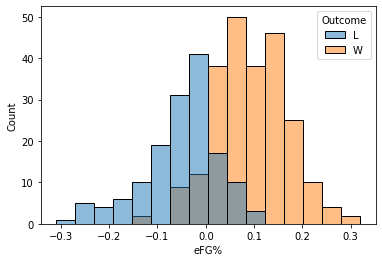

In [ ]:
sns.histplot(data=df,x='eFG%',hue='Outcome')

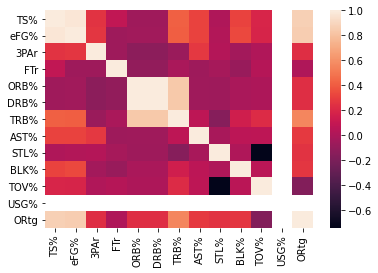

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


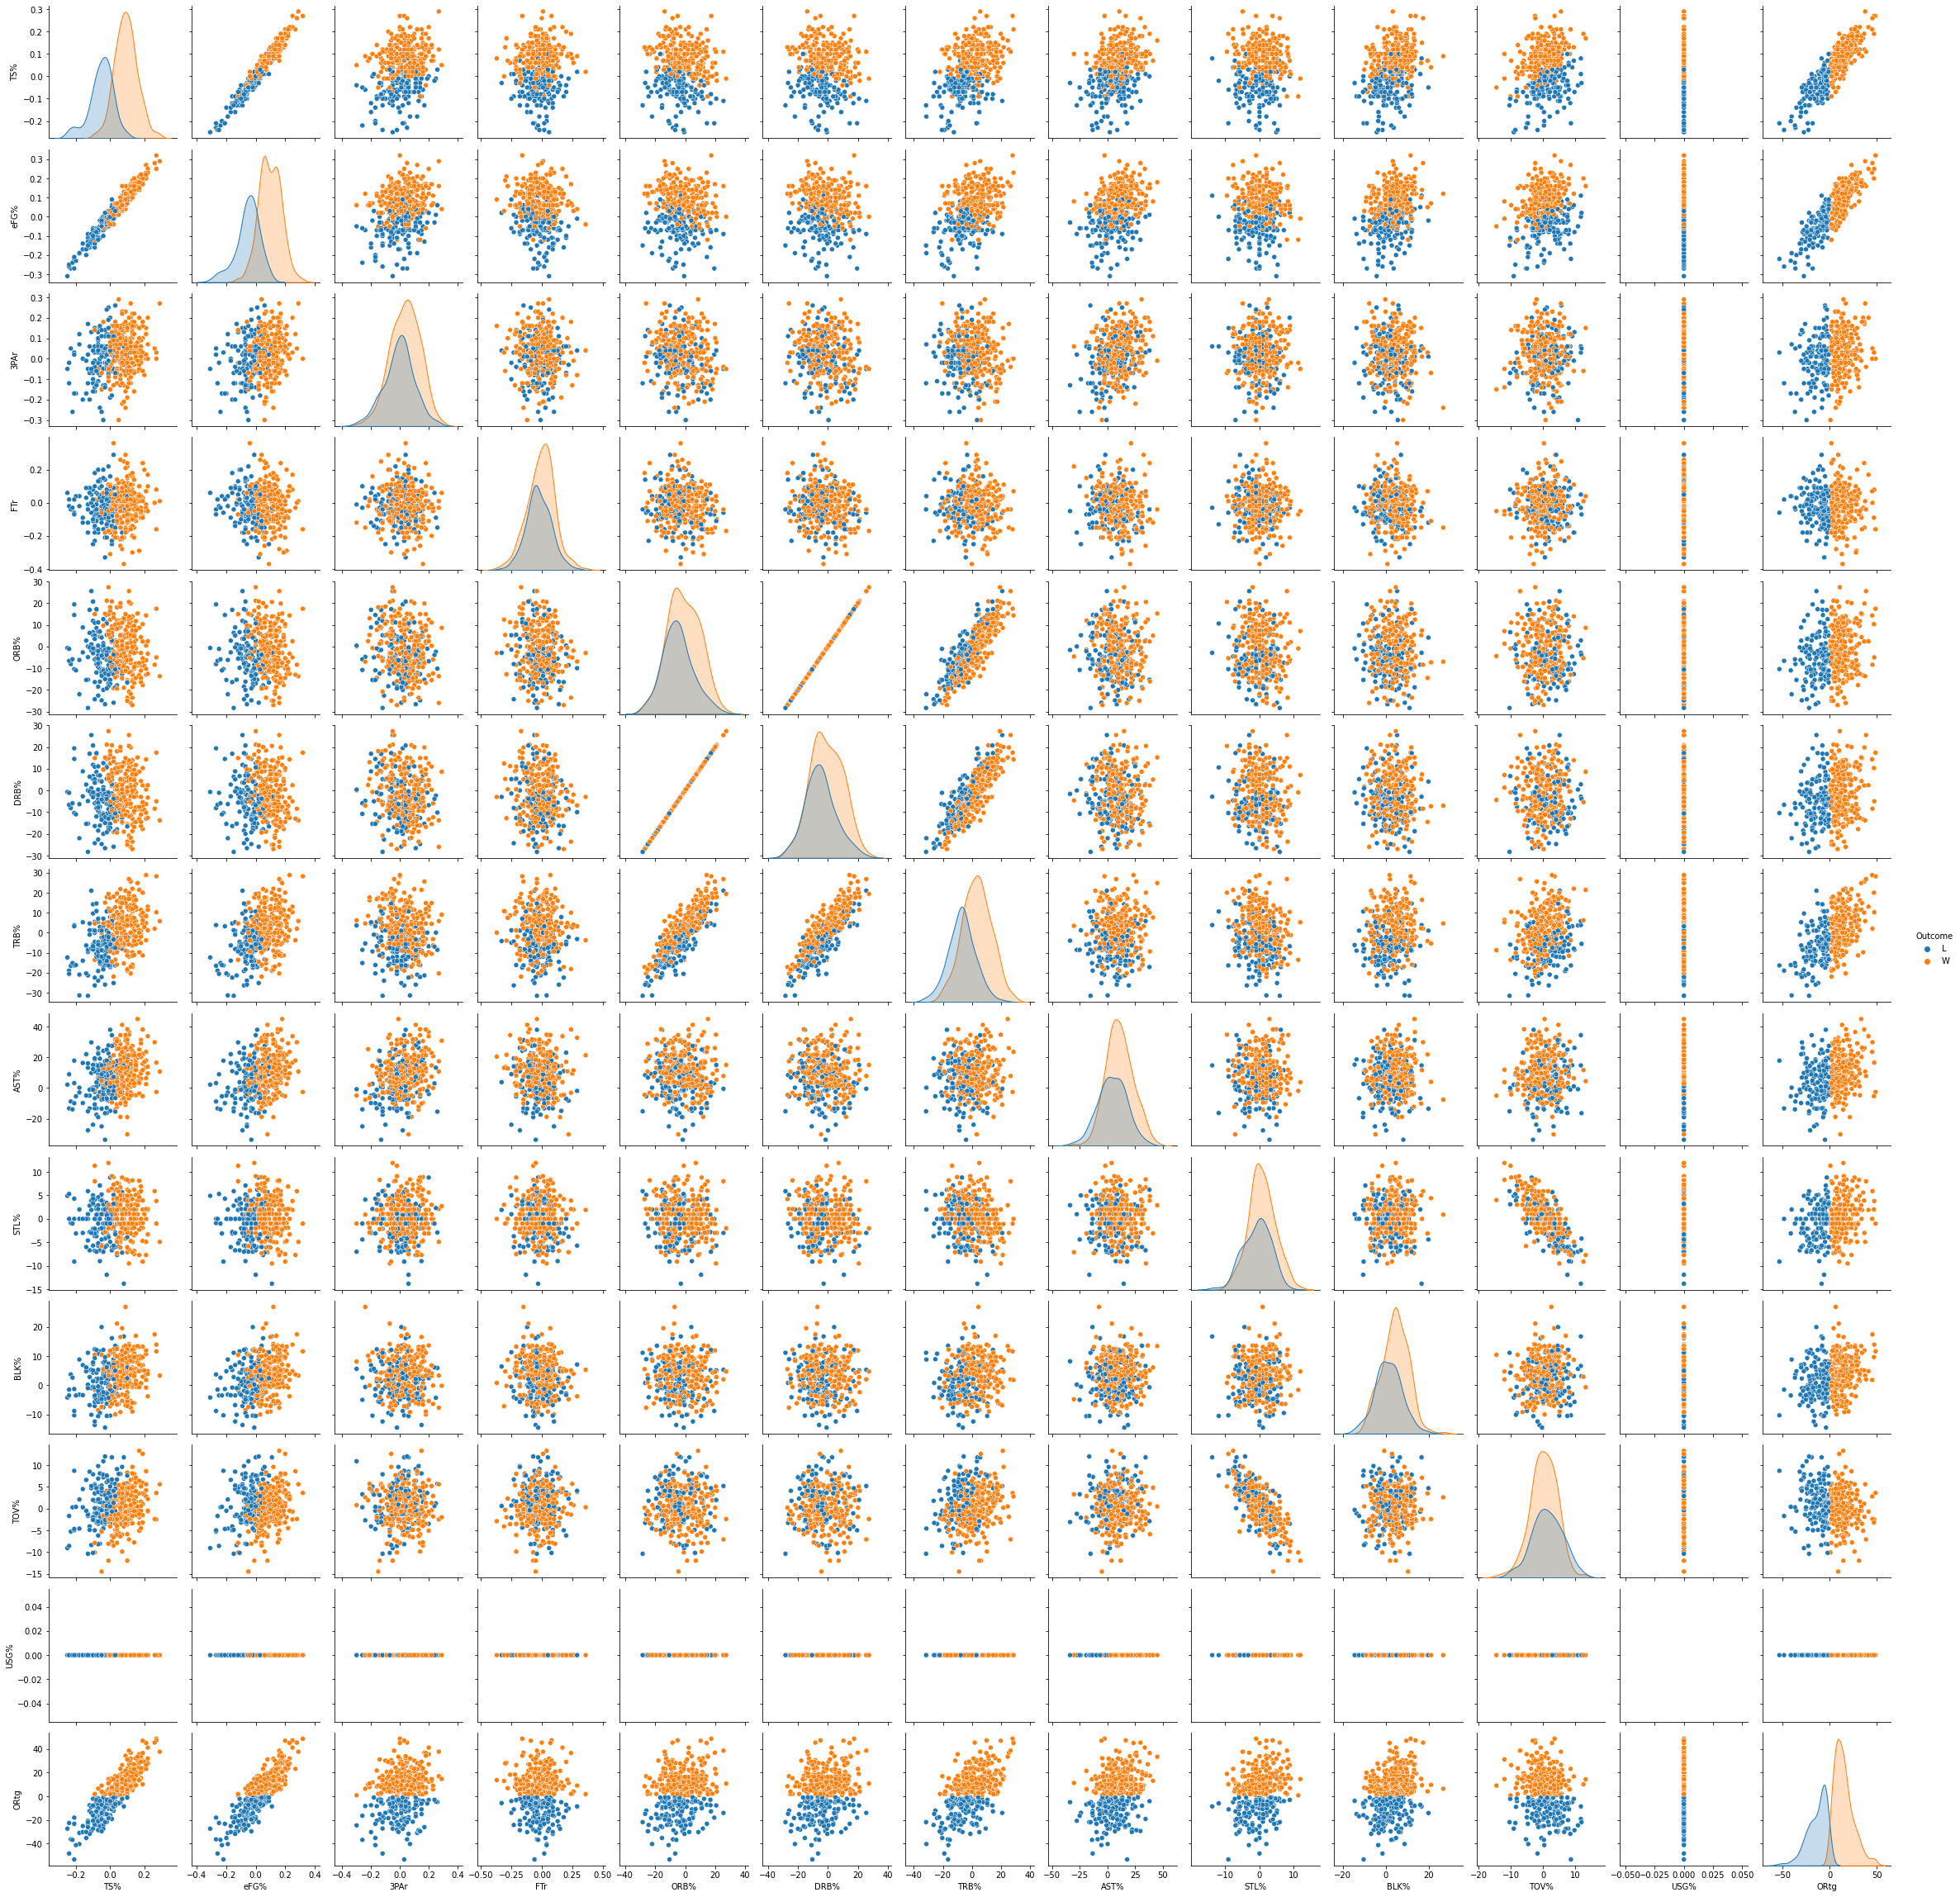

In [ ]:
# fig = plt.figure(figsize=(10,10))
ax = sns.pairplot(df, hue='Outcome', kind='scatter');
ax.savefig('pairplot.png')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(len(df))
df = df.dropna()
print(len(df))

385
383


In [ ]:
df['Outcome'] = df['Outcome'].apply(lambda x: True if x == 'W' else False)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,Outcome
0,-0.13,-0.11,-0.05,-0.12,-4.9,-4.9,-9.6,13.2,-4.6,-0.1,-1.7,0.0,-23.5,23.5,False
1,-0.23,-0.27,0.05,-0.04,-8.1,-8.1,-16.6,-8.8,-0.9,3.7,-5.3,0.0,-36.3,36.3,False
2,-0.09,-0.12,-0.02,-0.07,-0.9,-0.9,-13.6,-1.9,11.3,-1.6,-10.1,0.0,0.8,-0.8,True
3,0.13,0.14,0.05,0.16,-18.7,-18.7,-5.8,-4.7,0.0,0.0,4.6,0.0,9.8,-9.8,True
4,-0.06,-0.11,-0.02,0.09,-9.8,-9.8,-7.4,3.8,-6.7,11.6,5.1,0.0,-23.9,23.9,False


In [ ]:
X = df.iloc[:, [i for i in range(len(df.columns)-1)]].values
y = df.iloc[:, len(df.columns)-1].values
y

array([False, False,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(268, 14) (115, 14)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state=42, solver='lbfgs')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#y_proba = classifier.predict_proba(X_test)

In [ ]:
classifier.score(X_test, y_test)
classifier.score(X_train, y_train)

0.9888059701492538

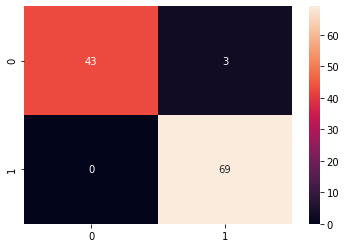

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
import sklearn.tree
from sklearn import metrics
treeClassifier = sklearn.tree.DecisionTreeClassifier(criterion='gini')
dtree = treeClassifier.fit(X_train, y_train)
train_accuracy = treeClassifier.score(X_train, y_train)
test_accuracy = treeClassifier.score(X_test, y_test)
print("Accuracy (train): %3f" % (train_accuracy))
print("Accuracy  (test): %3f" % (test_accuracy))

Accuracy (train): 1.000000
Accuracy  (test): 0.982609


No handles with labels found to put in legend.


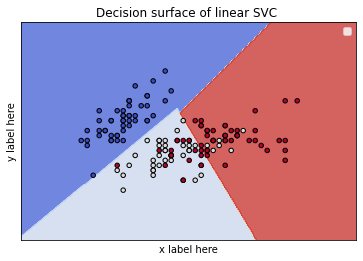

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf = clf.fit(X_train,de)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: ignored